In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
stock_data = yf.download("AAPL MSFT AMZN META TSLA JPM JNJ MA ADBE COST", start="2018-10-01", end="2023-10-01")

[*********************100%%**********************]  10 of 10 completed


In [3]:
print(stock_data)
stock_data.to_csv('stock_data.csv')

             Adj Close                                                  \
                  AAPL        ADBE        AMZN        COST         JNJ   
Date                                                                     
2018-10-01   54.342041  275.489990  100.218002  219.163818  121.235886   
2018-10-02   54.825062  272.000000   98.565498  220.751587  121.921478   
2018-10-03   55.492210  270.510010   97.638000  217.809494  120.663063   
2018-10-04   54.516594  263.709991   95.471001  216.389816  120.940811   
2018-10-05   53.631866  263.220001   94.482498  204.378540  120.723824   
...                ...         ...         ...         ...         ...   
2023-09-25  175.848328  511.600006  131.270004  557.596680  158.986816   
2023-09-26  171.733749  506.299988  125.980003  551.947083  157.756668   
2023-09-27  170.205750  502.600006  125.980003  562.497681  155.861847   
2023-09-28  170.465424  504.670013  125.980003  567.588318  155.633682   
2023-09-29  170.984741  509.899994  12

In [4]:
#Check for missing values
print(stock_data.isnull().sum())

Adj Close  AAPL    0
           ADBE    0
           AMZN    0
           COST    0
           JNJ     0
           JPM     0
           MA      0
           META    0
           MSFT    0
           TSLA    0
Close      AAPL    0
           ADBE    0
           AMZN    0
           COST    0
           JNJ     0
           JPM     0
           MA      0
           META    0
           MSFT    0
           TSLA    0
High       AAPL    0
           ADBE    0
           AMZN    0
           COST    0
           JNJ     0
           JPM     0
           MA      0
           META    0
           MSFT    0
           TSLA    0
Low        AAPL    0
           ADBE    0
           AMZN    0
           COST    0
           JNJ     0
           JPM     0
           MA      0
           META    0
           MSFT    0
           TSLA    0
Open       AAPL    0
           ADBE    0
           AMZN    0
           COST    0
           JNJ     0
           JPM     0
           MA      0
           ME

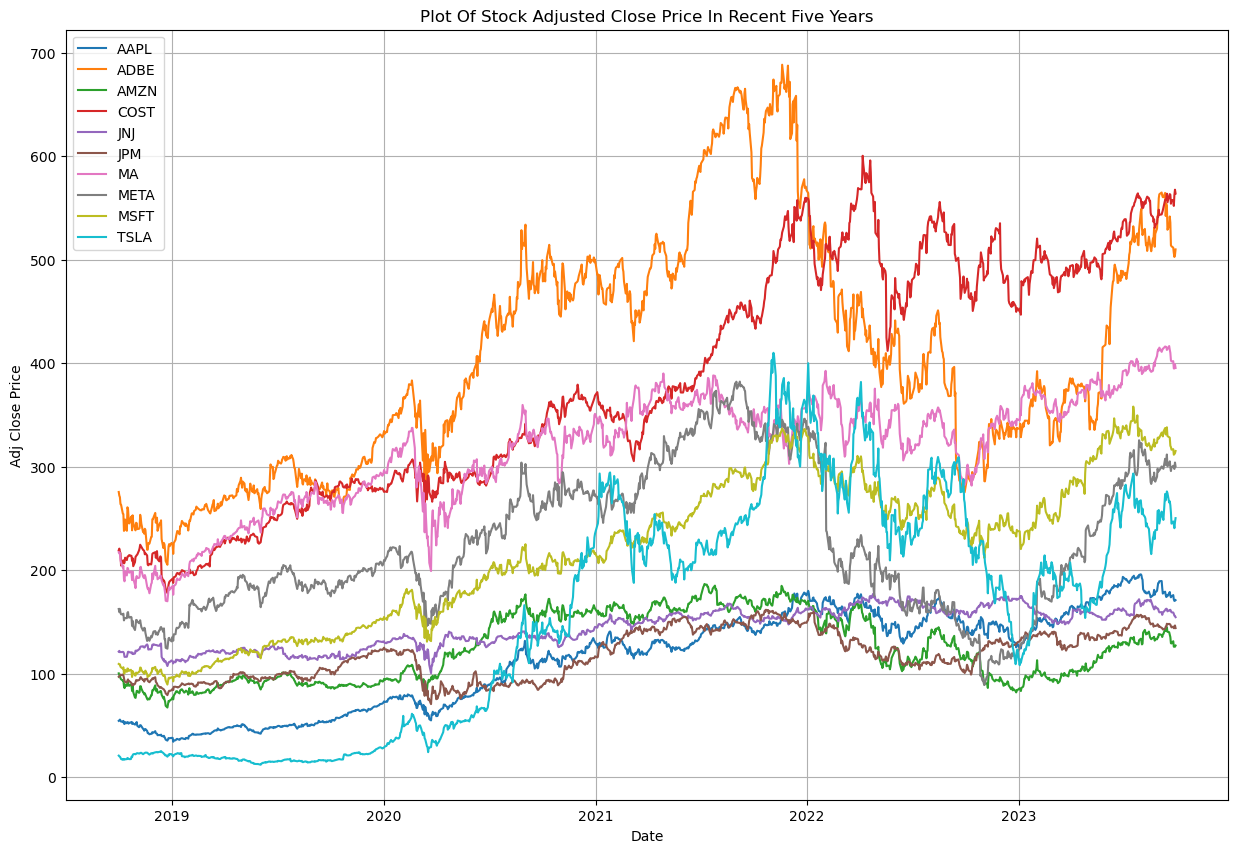

In [5]:
sorted_data = stock_data.sort_values(by="Date", ascending=False)
sorted_df = sorted_data['Adj Close']
plt.figure(figsize= (15, 10))
for column in sorted_df.columns:
    plt.plot(sorted_df.index, sorted_df[column], label=column)
plt.title("Plot Of Stock Adjusted Close Price In Recent Five Years")
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.legend()
plt.grid()
plt.show()

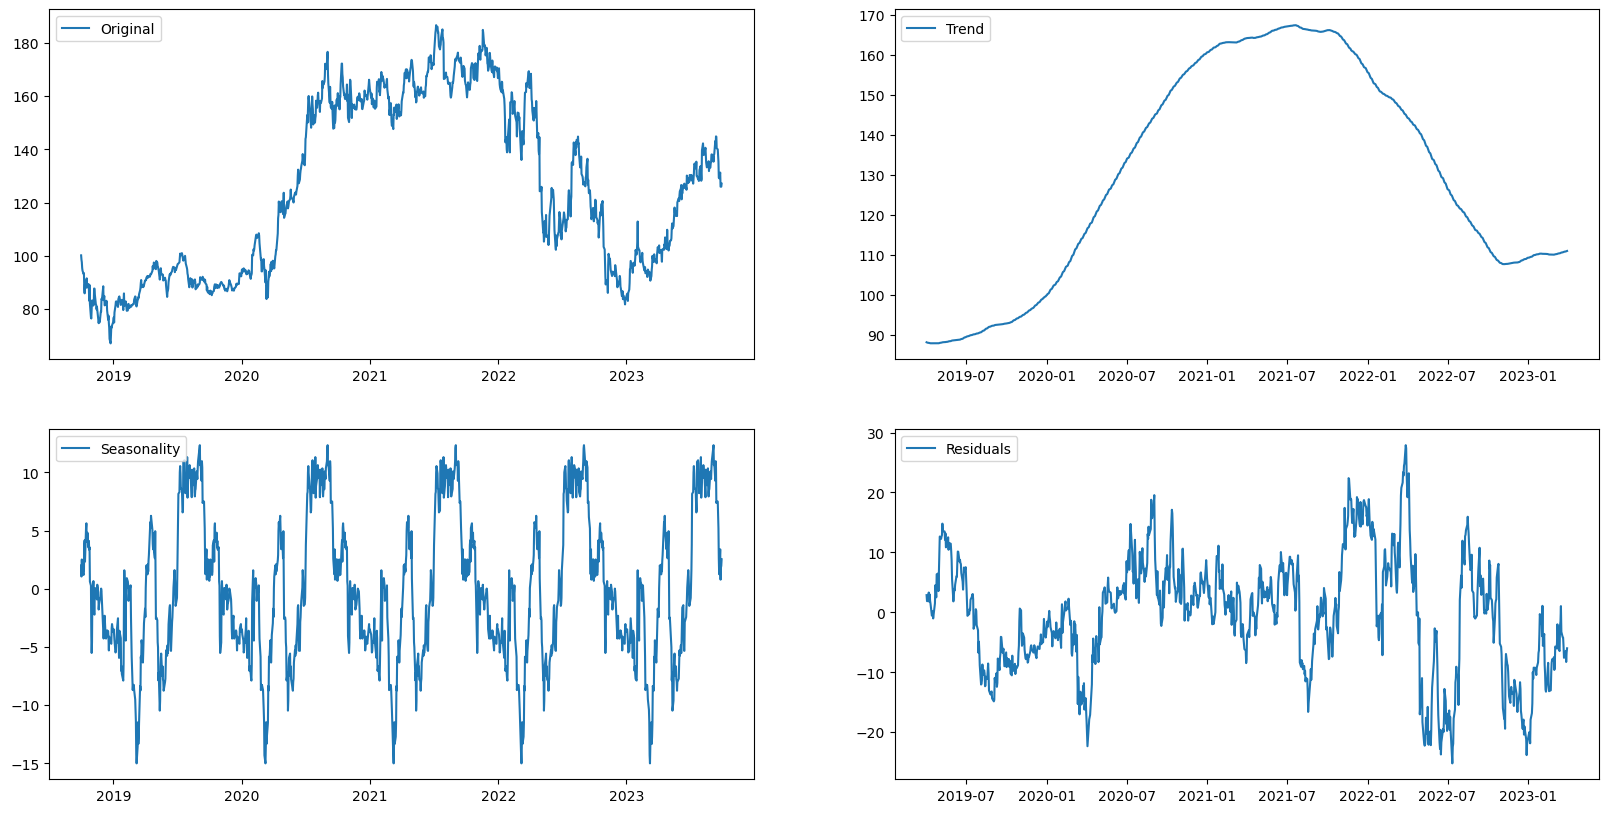

In [6]:
### Data decomposition of ADBE
stock_df = stock_data['Adj Close']
amazon = stock_df['AMZN']
apple = stock_df['AAPL']
microsoft = stock_df['MSFT']

from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

decomposition = seasonal_decompose(amazon, model='additive', period=252)
trend_estimate = decomposition.trend
seasonal_estimate = decomposition.seasonal
residual_estimate = decomposition.resid

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes[0, 0].plot(amazon, label='Original') 
axes[0, 0].legend(loc='upper left')
axes[0, 1].plot(trend_estimate, label='Trend')
axes[0, 1].legend(loc='upper left')
axes[1, 0].plot(seasonal_estimate, label='Seasonality')
axes[1, 0].legend(loc='upper left')
axes[1, 1].plot(residual_estimate, label='Residuals')
axes[1, 1].legend(loc='upper left')
plt.show()

In [7]:
### conduct Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

kpss_results = kpss(amazon, regression="ct")
print("Test statistics: {}".format(kpss_results[0]))
print("P_value: {}".format(kpss_results[1]))
print("Critical values: {}".format(kpss_results[-1]))

Test statistics: 1.1887107857888664
P_value: 0.01
Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


C:\Users\shumi\AppData\Local\Temp\ipykernel_26436\2302461376.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_results = kpss(amazon, regression="ct")


### Train-Test split

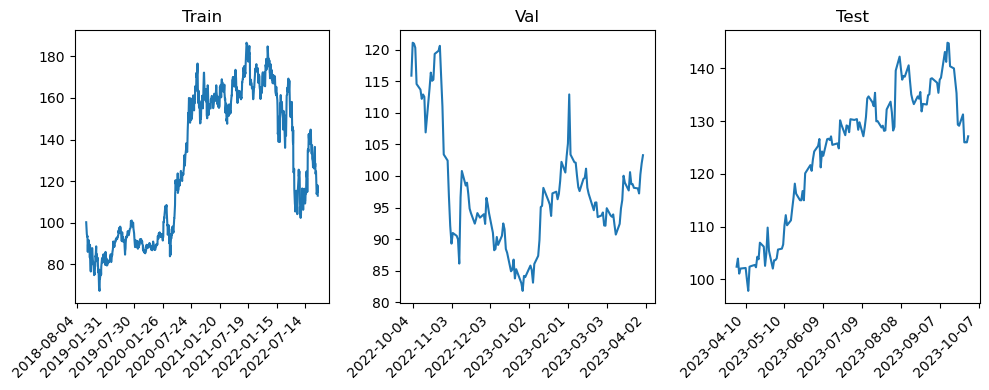

In [8]:
## amazon train-test split
amazon_df = amazon.to_frame().reset_index()
amazon_df.columns = ['Date', 'Adj Close']

amazon_train_set = amazon_df[(amazon_df.Date >= '2018-10-01') & (amazon_df.Date < '2022-10-01')]
amazon_train = amazon_train_set['Adj Close']
amazon_val_set = amazon_df[(amazon_df.Date >= '2022-10-01') & (amazon_df.Date < '2023-04-01')]
amazon_val = amazon_val_set['Adj Close']
amazon_test_set = amazon_df[(amazon_df.Date >= '2023-04-01') & (amazon_df.Date < '2023-10-01')]
amazon_test = amazon_test_set['Adj Close']

import matplotlib.dates as mdates
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# plot on each axis
ax[0].plot(amazon_train_set['Date'], amazon_train_set['Adj Close'])
ax[0].set_title('Train')
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=180))  # display every 55th date
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax[0].get_xticklabels(), rotation=45, ha='right')

ax[1].plot(amazon_val_set['Date'], amazon_val_set['Adj Close'])
ax[1].set_title('Val')
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=30))  # display every 12th date
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax[1].get_xticklabels(), rotation=45, ha='right')

ax[2].plot(amazon_test_set['Date'], amazon_test_set['Adj Close'])
ax[2].set_title('Test')
ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=30))  # display every 12th date
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax[2].get_xticklabels(), rotation=45, ha='right')
# set common x and y axis labels
fig.tight_layout()

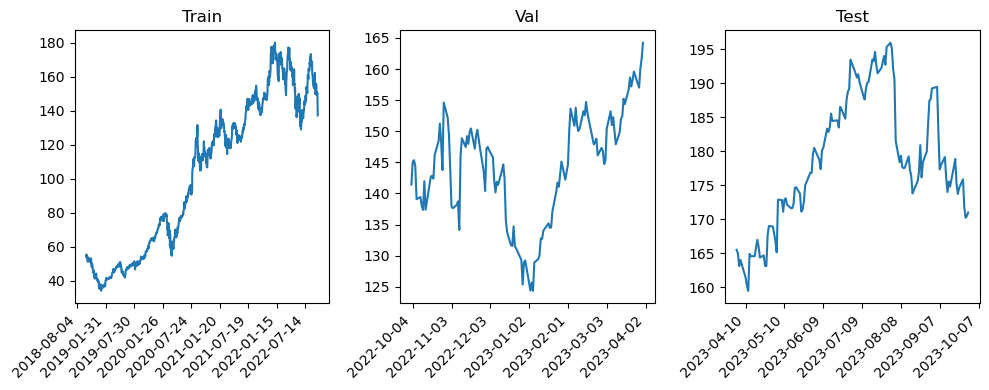

In [9]:
## apple train-test split
apple_df = apple.to_frame().reset_index()
apple_df.columns = ['Date', 'Adj Close']

apple_train_set = apple_df[(apple_df.Date >= '2018-10-01') & (apple_df.Date < '2022-10-01')]
apple_train = apple_train_set['Adj Close']
apple_val_set = apple_df[(apple_df.Date >= '2022-10-01') & (apple_df.Date < '2023-04-01')]
apple_val = apple_val_set['Adj Close']
apple_test_set = apple_df[(apple_df.Date >= '2023-04-01') & (apple_df.Date < '2023-10-01')]
apple_test = apple_test_set['Adj Close']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# plot on each axis
ax[0].plot(apple_train_set['Date'], apple_train_set['Adj Close'])
ax[0].set_title('Train')
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=180))  # display every 55th date
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax[0].get_xticklabels(), rotation=45, ha='right')

ax[1].plot(apple_val_set['Date'], apple_val_set['Adj Close'])
ax[1].set_title('Val')
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=30))  # display every 12th date
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax[1].get_xticklabels(), rotation=45, ha='right')

ax[2].plot(apple_test_set['Date'], apple_test_set['Adj Close'])
ax[2].set_title('Test')
ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=30))  # display every 12th date
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax[2].get_xticklabels(), rotation=45, ha='right')
# set common x and y axis labels
fig.tight_layout()

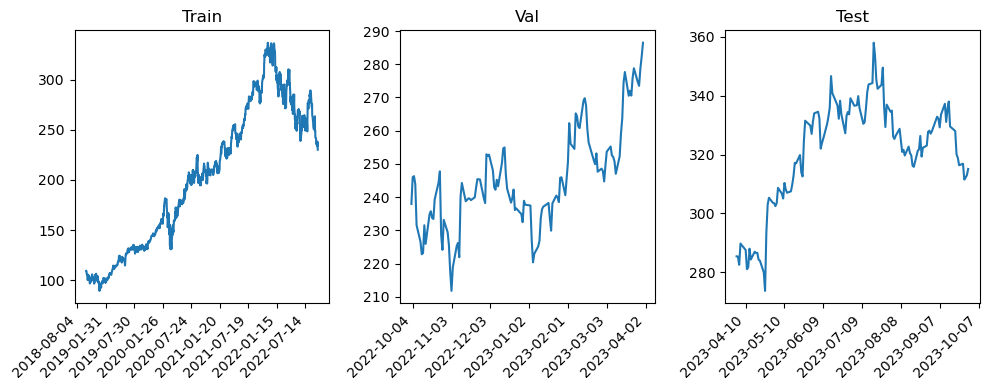

In [10]:
## microsoft train-test split
microsoft_df = microsoft.to_frame().reset_index()
microsoft_df.columns = ['Date', 'Adj Close']

microsoft_train_set = microsoft_df[(microsoft_df.Date >= '2018-10-01') & (microsoft_df.Date < '2022-10-01')]
microsoft_train = microsoft_train_set['Adj Close']
microsoft_val_set = microsoft_df[(microsoft_df.Date >= '2022-10-01') & (microsoft_df.Date < '2023-04-01')]
microsoft_val = microsoft_val_set['Adj Close']
microsoft_test_set = microsoft_df[(microsoft_df.Date >= '2023-04-01') & (microsoft_df.Date < '2023-10-01')]
microsoft_test = microsoft_test_set['Adj Close']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# plot on each axis
ax[0].plot(microsoft_train_set['Date'], microsoft_train_set['Adj Close'])
ax[0].set_title('Train')
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=180))  # display every 55th date
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax[0].get_xticklabels(), rotation=45, ha='right')

ax[1].plot(microsoft_val_set['Date'], microsoft_val_set['Adj Close'])
ax[1].set_title('Val')
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=30))  # display every 12th date
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax[1].get_xticklabels(), rotation=45, ha='right')

ax[2].plot(microsoft_test_set['Date'], microsoft_test_set['Adj Close'])
ax[2].set_title('Test')
ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=30))  # display every 12th date
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax[2].get_xticklabels(), rotation=45, ha='right')
# set common x and y axis labels
fig.tight_layout()

### LSTM Model

#### Amazon Model Training

In [11]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D

scaler = MinMaxScaler()
amazon_train_scaled = scaler.fit_transform(amazon_train.values.reshape(-1, 1))
amazon_val_scaled = scaler.transform(amazon_val.values.reshape(-1, 1))
amazon_test_scaled = scaler.transform(amazon_test.values.reshape(-1, 1))

def create_dataset(data, timesteps):
    x_data, y_data = [], []
    for i in range(len(data) - timesteps):
        x_data.append(data[i:(i + timesteps)])
        y_data.append(data[i + timesteps])
    return np.array(x_data), np.array(y_data)

time_step_interval = 5 ## stock price in a week
x_train, y_train = create_dataset(amazon_train_scaled, time_step_interval)
x_val, y_val = create_dataset(amazon_val_scaled, time_step_interval)
x_test, y_test = create_dataset(amazon_test_scaled, time_step_interval)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [12]:
# Create the LSTM model
lstm = Sequential()
lstm.add(Conv1D(filters=32, kernel_size=1, input_shape=(x_train.shape[1], x_train.shape[2])))
lstm.add(LSTM(units=64, return_sequences=True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=32))
lstm.add(Dense(1))
lstm.compile(optimizer='adam', loss='mse')
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 32)             64        
                                                                 
 lstm (LSTM)                 (None, 5, 64)             24832     
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 37345 (145.88 KB)
Trainable params: 37345 (145.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
lstm.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=16)

Epoch 1/50
63/63 [==============================] - 3s 11ms/step - loss: 0.0372 - val_loss: 0.0022
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 8/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 9/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 10/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 11/50
63/63 

In [14]:
y_test_pred = lstm.predict(x_test)[1:]

# Inverse transform the predictions
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))
y_test_true_inv = scaler.inverse_transform(y_test.reshape(-1, 1))[:-1]

date_range = amazon_test_set.Date[time_step_interval + 1:]

4/4 [==============================] - 0s 2ms/step


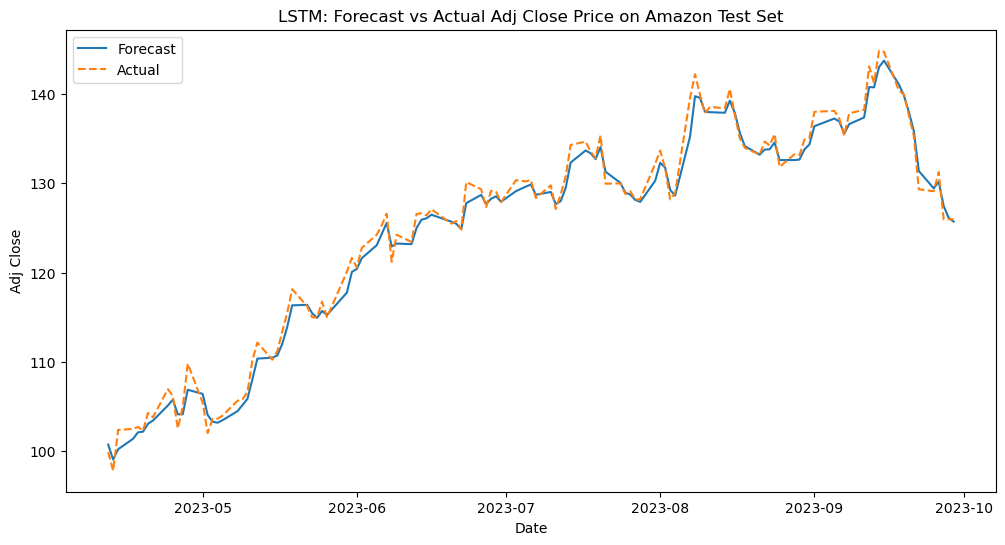

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(date_range, y_test_pred_inv, label="Forecast")
plt.plot(date_range, y_test_true_inv, linestyle='--', label="Actual")
plt.ylabel("Adj Close")
plt.xlabel("Date")
plt.title("LSTM: Forecast vs Actual Adj Close Price on Amazon Test Set")
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

results_lstm = {}
mse = mean_squared_error(y_test_true_inv, y_test_pred_inv)
rmse = sqrt(mse)
r2 = r2_score(y_test_true_inv, y_test_pred_inv)

results_lstm[f'AMZN_LSTM'] = {'MSE': mse, 'RMSE': rmse, 'R-squared': r2}
print(results_lstm)

{'AMZN_LSTM': {'MSE': 1.3098574620725385, 'RMSE': 1.144490044549335, 'R-squared': 0.9912008037464733}}


### Apple Model Training

In [32]:
scaler = MinMaxScaler()
apple_train_scaled = scaler.fit_transform(apple_train.values.reshape(-1, 1))
apple_val_scaled = scaler.transform(apple_val.values.reshape(-1, 1))
apple_test_scaled = scaler.transform(apple_test.values.reshape(-1, 1))

x_train_2, y_train_2 = create_dataset(apple_train_scaled, time_step_interval)
x_val_2, y_val_2 = create_dataset(apple_val_scaled, time_step_interval)
x_test_2, y_test_2 = create_dataset(apple_test_scaled, time_step_interval)

x_train_2 = np.reshape(x_train_2, (x_train_2.shape[0], x_train_2.shape[1], 1))
x_val_2 = np.reshape(x_val_2, (x_val_2.shape[0], x_val_2.shape[1], 1))
x_test_2 = np.reshape(x_test_2, (x_test_2.shape[0], x_test_2.shape[1], 1))

In [33]:
# Create the LSTM model
lstm2 = Sequential()
lstm2.add(Conv1D(filters=32, kernel_size=1, input_shape=(x_train_2.shape[1], x_train_2.shape[2])))
lstm2.add(LSTM(units=64, return_sequences=True))
lstm2.add(Dropout(0.2))
lstm2.add(LSTM(units=32))
lstm2.add(Dense(1))
lstm2.compile(optimizer='adam', loss='mse')
lstm2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 5, 32)             64        
                                                                 
 lstm_4 (LSTM)               (None, 5, 64)             24832     
                                                                 
 dropout_2 (Dropout)         (None, 5, 64)             0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 37345 (145.88 KB)
Trainable params: 37345 (145.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
lstm2.fit(x_train_2, y_train_2, validation_data=(x_val_2, y_val_2), epochs=50, batch_size=16)

Epoch 1/50
63/63 [==============================] - 3s 11ms/step - loss: 0.0238 - val_loss: 0.0011
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 8.8953e-04
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 8.9776e-04
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 9.0827e-04
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 9.5314e-04
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 9.9974e-04 - val_loss: 8.8809e-04
Epoch 8/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 9.0305e-04
Epoch 9/50
63/63 [==============================] - 0s 4ms/step - loss: 9.6880e-04 - val_loss: 9.2495e-04
Epoch 10/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0010 -

In [35]:
y_test_2_pred = lstm2.predict(x_test_2)[1:]

# Inverse transform the predictions
y_test_2_pred_inv = scaler.inverse_transform(y_test_2_pred.reshape(-1, 1))
y_test_2_true_inv = scaler.inverse_transform(y_test_2.reshape(-1, 1))[:-1]

date_range = apple_test_set.Date[time_step_interval+1:]

4/4 [==============================] - 0s 2ms/step


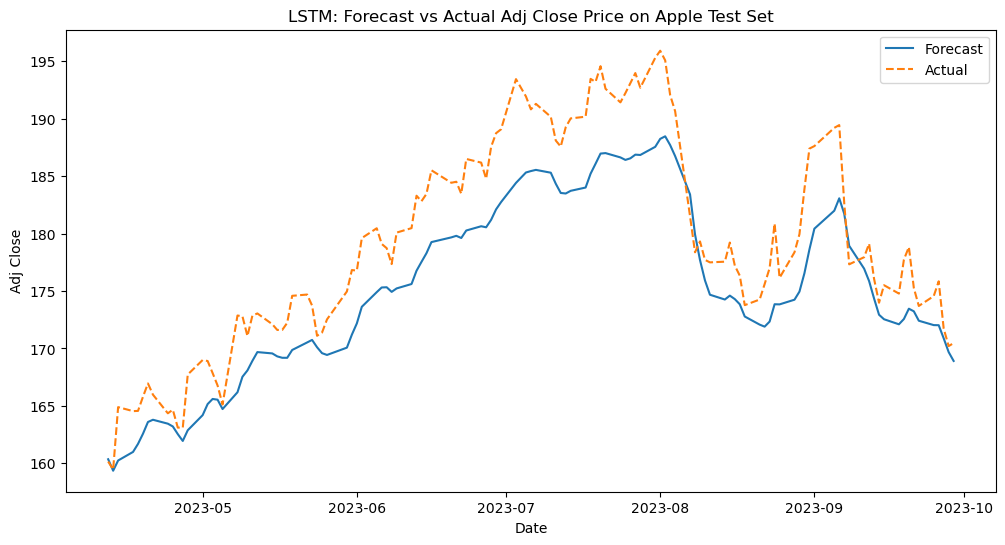

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(date_range, y_test_2_pred_inv, label="Forecast")
plt.plot(date_range, y_test_2_true_inv, linestyle='--', label="Actual")
plt.ylabel("Adj Close")
plt.xlabel("Date")
plt.title("LSTM: Forecast vs Actual Adj Close Price on Apple Test Set")
plt.legend()
plt.show()

In [37]:
## Show the test score of lstm model prediction
mse = mean_squared_error(y_test_2_true_inv, y_test_2_pred_inv)
rmse = sqrt(mse)
r2 = r2_score(y_test_2_true_inv, y_test_2_pred_inv)

results_lstm[f'AAPL_LSTM'] = {'MSE': mse, 'RMSE': rmse, 'R-squared': r2}

results_lstm_df = pd.DataFrame(results_lstm).T
print(results_lstm_df)

                 MSE     RMSE  R-squared
AMZN_LSTM   1.309857  1.14449   0.991201
AAPL_LSTM  21.115588  4.59517   0.745355


#### Microsoft Model Training

In [38]:
scaler = MinMaxScaler()
microsoft_train_scaled = scaler.fit_transform(microsoft_train.values.reshape(-1, 1))
microsoft_val_scaled = scaler.transform(microsoft_val.values.reshape(-1, 1))
microsoft_test_scaled = scaler.transform(microsoft_test.values.reshape(-1, 1))

x_train_3, y_train_3 = create_dataset(microsoft_train_scaled, time_step_interval)
x_val_3, y_val_3 = create_dataset(microsoft_val_scaled, time_step_interval)
x_test_3, y_test_3 = create_dataset(microsoft_test_scaled, time_step_interval)

x_train_3 = np.reshape(x_train_3, (x_train_3.shape[0], x_train_3.shape[1], 1))
x_val_3 = np.reshape(x_val_2, (x_val_3.shape[0], x_val_3.shape[1], 1))
x_test_3 = np.reshape(x_test_2, (x_test_3.shape[0], x_test_3.shape[1], 1))

In [39]:
# Create the LSTM model
lstm3 = Sequential()
lstm3.add(Conv1D(filters=32, kernel_size=1, input_shape=(x_train_2.shape[1], x_train_2.shape[2])))
lstm3.add(LSTM(units=64, return_sequences=True))
lstm3.add(Dropout(0.2))
lstm3.add(LSTM(units=32))
lstm3.add(Dense(1))
lstm3.compile(optimizer='adam', loss='mse')
lstm3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 5, 32)             64        
                                                                 
 lstm_6 (LSTM)               (None, 5, 64)             24832     
                                                                 
 dropout_3 (Dropout)         (None, 5, 64)             0         
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 37345 (145.88 KB)
Trainable params: 37345 (145.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
lstm3.fit(x_train_3, y_train_3, validation_data=(x_val_3, y_val_3), epochs=50, batch_size=16)

Epoch 1/50
63/63 [==============================] - 3s 11ms/step - loss: 0.0193 - val_loss: 0.0209
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0202
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0123
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0209
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0175
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0159
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 9.9830e-04 - val_loss: 0.0218
Epoch 8/50
63/63 [==============================] - 0s 4ms/step - loss: 8.8519e-04 - val_loss: 0.0183
Epoch 9/50
63/63 [==============================] - 0s 4ms/step - loss: 9.0488e-04 - val_loss: 0.0195
Epoch 10/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0100
Epoch 

In [41]:
y_test_3_pred = lstm3.predict(x_test_3)[1:]

# Inverse transform the predictions
y_test_3_pred_inv = scaler.inverse_transform(y_test_3_pred.reshape(-1, 1))
y_test_3_true_inv = scaler.inverse_transform(y_test_3.reshape(-1, 1))[:-1]

date_range = microsoft_test_set.Date[time_step_interval+1:]

4/4 [==============================] - 0s 2ms/step


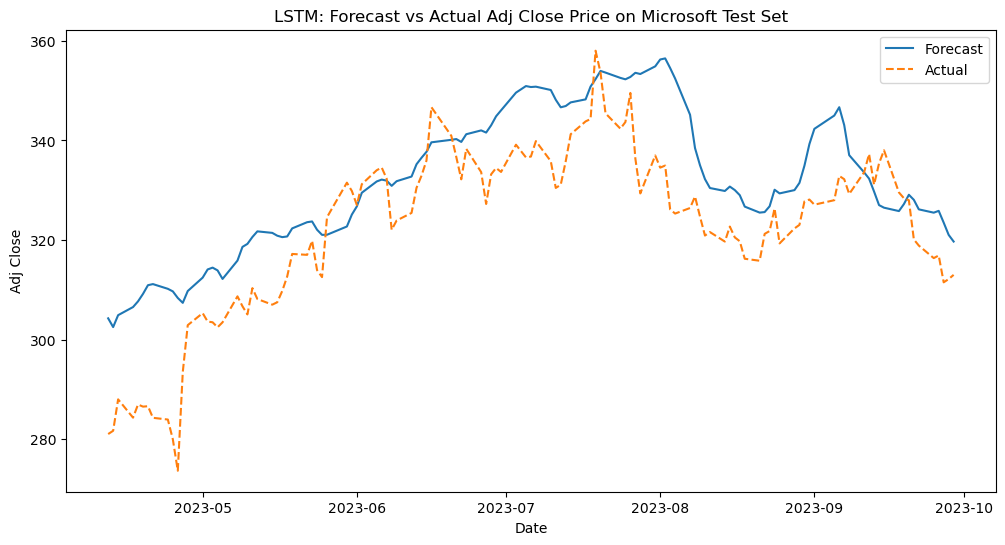

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(date_range, y_test_3_pred_inv, label="Forecast")
plt.plot(date_range, y_test_3_true_inv, linestyle='--', label="Actual")
plt.ylabel("Adj Close")
plt.xlabel("Date")
plt.title("LSTM: Forecast vs Actual Adj Close Price on Microsoft Test Set")
plt.legend()
plt.show()

In [44]:
## Show the test score of lstm model prediction
mse = mean_squared_error(y_test_3_true_inv, y_test_3_pred_inv)
rmse = sqrt(mse)
r2 = r2_score(y_test_3_true_inv, y_test_3_pred_inv)

results_lstm[f'MSFT_LSTM'] = {'MSE': mse, 'RMSE': rmse, 'R-squared': r2}

results_lstm_df = pd.DataFrame(results_lstm).T
print(results_lstm_df)

                  MSE       RMSE  R-squared
AMZN_LSTM    1.309857   1.144490   0.991201
AAPL_LSTM   21.115588   4.595170   0.745355
MSFT_LSTM  160.609287  12.673172   0.450131
